In [18]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv("Banking_dataset.csv").round(2)

In [78]:
df.head()
df.shape

(1000, 6)

In [38]:
df.isnull().sum()

Bank_ID              0
Number_of_DD         0
Withdrawals          0
Deposits             0
Branch_Area_sqft     0
Avg_Daily_Walkins    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Bank_ID            1000 non-null   int64
 1   Number_of_DD       1000 non-null   int64
 2   Withdrawals        1000 non-null   int64
 3   Deposits           1000 non-null   int64
 4   Branch_Area_sqft   1000 non-null   int64
 5   Avg_Daily_Walkins  1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [40]:
df.describe().round(2)

,Bank_ID,Number_of_DD,Withdrawals,Deposits,Branch_Area_sqft,Avg_Daily_Walkins
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,5.44,49.99,244.38,4977.11,2727.92,275.58
std,2.84,29.01,146.26,2899.33,1258.11,132.48
min,1.00,0.00,0.00,2.00,507.00,50.00
25%,3.00,25.00,116.50,2567.00,1717.25,159.00
50%,5.00,49.00,241.00,4942.00,2646.00,276.00
75%,8.00,75.25,375.00,7547.25,3793.50,394.00
max,10.00,99.00,499.00,9990.00,4996.00,499.00


In [48]:
df.duplicated().sum()

0

In [41]:
#The data Standard Deviation is high so the Data is unevenly Distributed

In [42]:
#since the data is unevenly distributed and S.D is high Scaling is important

In [43]:
df = df.rename(columns={
    'Bank_ID': 'Bank',
    'Number_of_DD': 'DD'})
df.head()

,Bank,DD,Withdrawals,Deposits,Branch_Area_sqft,Avg_Daily_Walkins
0,6,57,21,968,1284,241
1,1,80,63,8183,1577,263
2,4,41,222,2512,2505,127
3,4,90,101,5066,1206,146
4,8,66,145,1935,4577,156


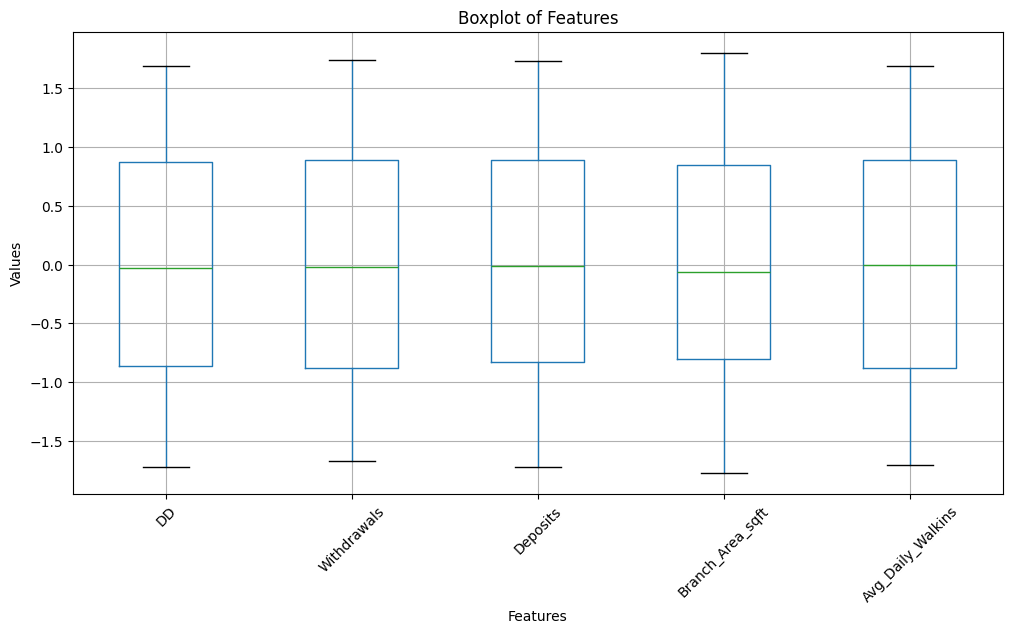

In [79]:
#Boxplot for outlier check
import matplotlib.pyplot as plt

# Assuming scaled_df is your dataset
plt.figure(figsize=(12, 6))
scaled_df.boxplot()
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [80]:
# The data looks clean and fine great 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X=StandardScaler()

In [45]:
scaled_df=pd.DataFrame(X.fit_transform(df.iloc[:,1:6]),columns=df.columns[1:]).round(2)

In [47]:
scaled_df

,DD,Withdrawals,Deposits,Branch_Area_sqft,Avg_Daily_Walkins
0,0.24,-1.53,-1.38,-1.15,-0.26
1,1.04,-1.24,1.11,-0.92,-0.10
2,-0.31,-0.15,-0.85,-0.18,-1.12
3,1.38,-0.98,0.03,-1.21,-0.98
4,0.55,-0.68,-1.05,1.47,-0.90
...,...,...,...,...,...
995,-1.14,0.48,1.54,0.63,-0.59
996,-0.72,-0.64,-0.54,0.94,0.58
997,1.41,0.07,1.15,-1.21,0.45
998,-0.55,-0.02,0.36,-0.78,0.15


In [49]:
#From the data we can use clustering techniques to cluster the data by similar points

# Creating clusters using KMeans

In [52]:
from sklearn.cluster import KMeans

In [64]:
k_Means=KMeans(n_clusters=2,random_state=1)

In [65]:
k_Means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [66]:
k_Means.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [69]:
round(k_Means.inertia_,2)

4237.56

In [106]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_, 2)
labels=k_means.labels_

# Cluster evaluation using Silhouette score 

In [107]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [108]:
silhouette_score(scaled_df,labels,random_state=1)

0.14396461674622457

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming scaled_df is your dataset
k_values = [4, 5]  # List of number of clusters to evaluate
for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(scaled_df)
    labels = k_means.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    print(f"For {k} clusters, the silhouette score is: {silhouette_avg:.2f}")


For 4 clusters, the silhouette score is: 0.16
For 5 clusters, the silhouette score is: 0.16


In [119]:
silhouette_score(scaled_df,labels1,random_state=1)

0.14396461674622457

In [122]:
silhouette_score(scaled_df,labels2,random_state=1)

0.14396461674622457

In [127]:
#The perfect clusters lies between the 4 and 5 which is optimal